EDA SUBMISSION OF
M. Hamza Shariq
Muhammad Hur
Danial Naqvi 

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import missingno as mano
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
file_names= ['201701-citibike-tripdata.csv', '201702-citibike-tripdata.csv', '201703-citibike-tripdata.csv', '201801-citibike-tripdata.csv', 
             '201802-citibike-tripdata.csv', '201803-citibike-tripdata.csv', '201901-citibike-tripdata.csv', '201902-citibike-tripdata.csv',
             '201903-citibike-tripdata.csv']
dfs = []  # List to store individual dataframes

for file in file_names:
    df = pd.read_csv(file)  # Load csv file
    df.columns = df.columns.str.replace(' ', '').str.lower()
    dfs.append(df)  # Append to the list of dataframes


combined_df = pd.concat(dfs, ignore_index=True)  # Concatenate all dataframes vertically
print(combined_df)

         tripduration                 starttime                  stoptime  \
0                 680       2017-01-01 00:00:21       2017-01-01 00:11:41   
1                1282       2017-01-01 00:00:45       2017-01-01 00:22:08   
2                 648       2017-01-01 00:00:57       2017-01-01 00:11:46   
3                 631       2017-01-01 00:01:10       2017-01-01 00:11:42   
4                 621       2017-01-01 00:01:25       2017-01-01 00:11:47   
...               ...                       ...                       ...   
8023754           351  2019-03-31 23:59:30.5850  2019-04-01 00:05:21.7850   
8023755          1943  2019-03-31 23:59:55.3410  2019-04-01 00:32:18.6920   
8023756           515  2019-03-31 23:59:50.1810  2019-04-01 00:08:25.8330   
8023757           660  2019-03-31 23:59:56.6520  2019-04-01 00:10:57.3760   
8023758           132  2019-03-31 23:59:58.0230  2019-04-01 00:02:10.5920   

         startstationid             startstationname  startstationlatitude 

In [4]:
answer_counts = combined_df['gender'].value_counts()
print(answer_counts)

1    5903512
2    1727332
0     392915
Name: gender, dtype: int64


In [4]:
print(combined_df.columns)

Index(['tripduration', 'starttime', 'stoptime', 'startstationid',
       'startstationname', 'startstationlatitude', 'startstationlongitude',
       'endstationid', 'endstationname', 'endstationlatitude',
       'endstationlongitude', 'bikeid', 'usertype', 'birthyear', 'gender'],
      dtype='object')


In [23]:
combined_df.isnull().sum()

tripduration                  0
starttime                     0
stoptime                      0
startstationid               37
startstationname             37
startstationlatitude          0
startstationlongitude         0
endstationid                 37
endstationname               37
endstationlatitude            0
endstationlongitude           0
bikeid                        0
usertype                  15909
birthyear                111245
gender                        0
dtype: int64

<AxesSubplot:>

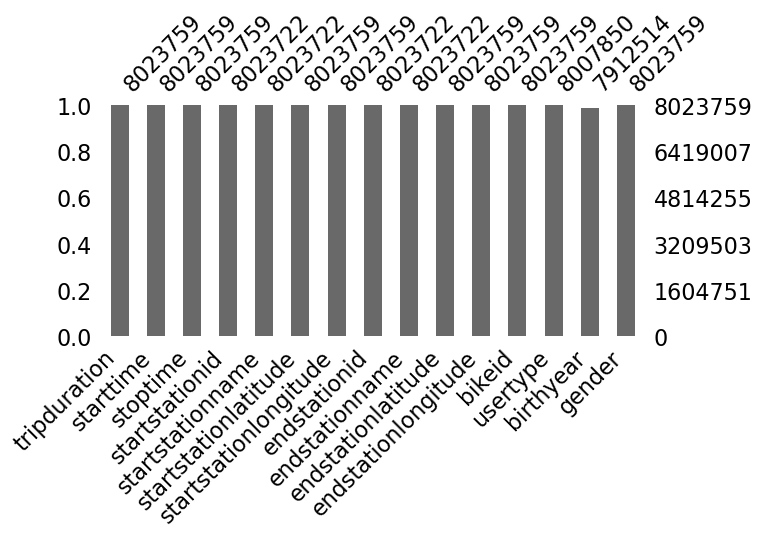

In [19]:
mano.bar(combined_df,  figsize=(7,3))


<AxesSubplot:>

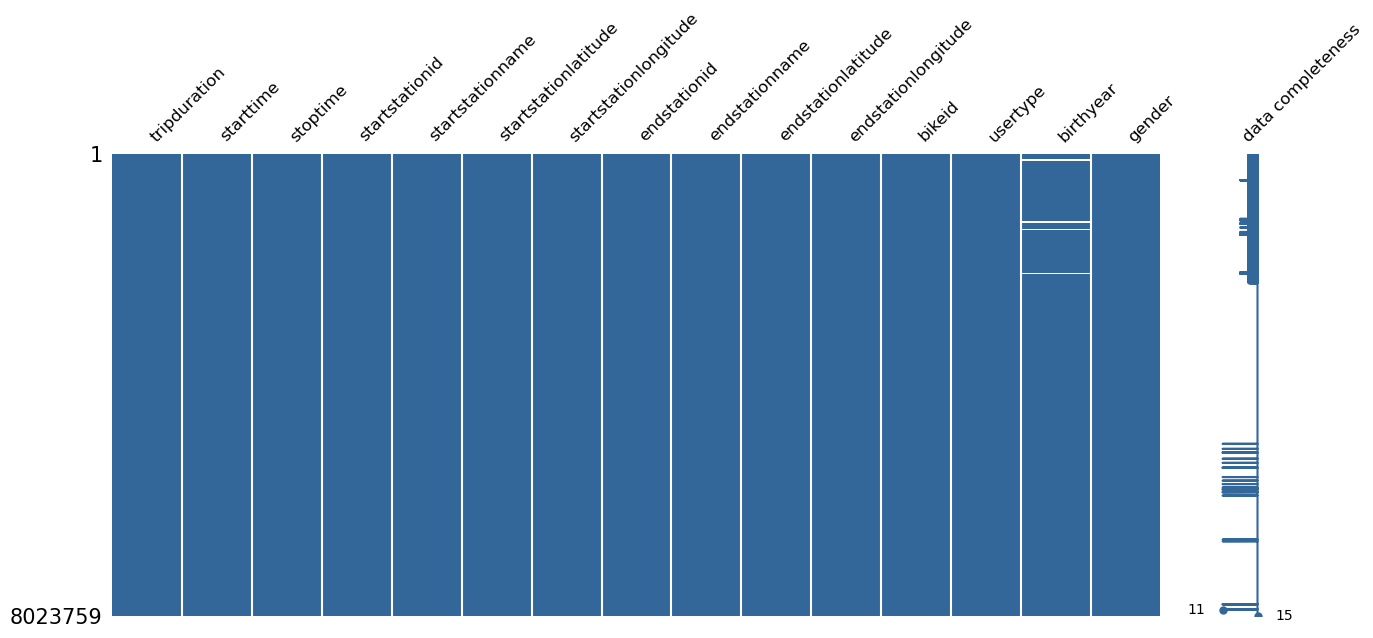

In [21]:
mano.matrix(combined_df, figsize=(15, 6), color=(0.2, 0.4, 0.6), fontsize=12, labels=True, sparkline=True)


In [23]:
combined_df.isnull().sum()

tripduration                  0
starttime                     0
stoptime                      0
startstationid               37
startstationname             37
startstationlatitude          0
startstationlongitude         0
endstationid                 37
endstationname               37
endstationlatitude            0
endstationlongitude           0
bikeid                        0
usertype                  15909
birthyear                111245
gender                        0
dtype: int64

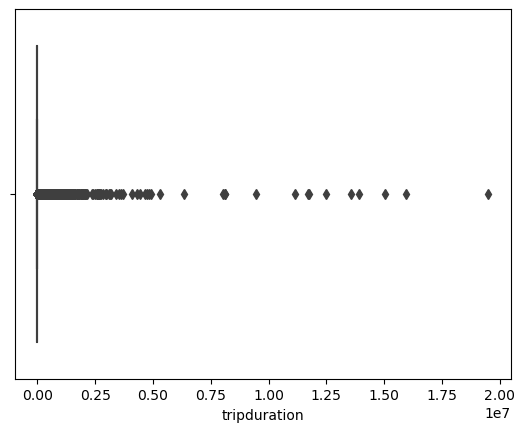

In [31]:
sns.boxplot(x='tripduration',data=combined_df)
plt.show()



In [37]:
#we can see that there are several outliers here as our plot is immensely skewed to the left, this could be because majortiy of people ride 
# for a certain time (around <half an hour), and some outliers prefer to ride higher, but these are very rare
print('Maximum value of trip duration : {} days'.format(round(combined_df['tripduration'].max()/3600*12, 2)))
print('There are {} trips taken less than an hour'.format(combined_df[combined_df['tripduration'] <= 3600].shape[0]))
print('And it is {}% out of the whold dataset'.format(round(combined_df[combined_df['tripduration'] <= 3600]
                                                        .shape[0]*100/combined_df.shape[0],2)))

Maximum value of trip duration : 65033.5 days
There are 7983902 trips taken less than an hour
And it is 99.5% out of the whold dataset


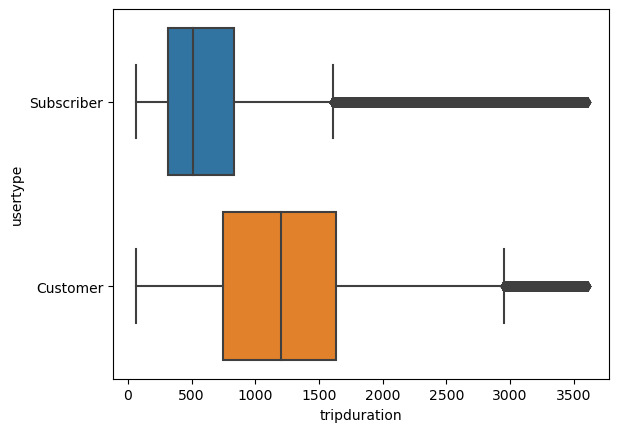

In [24]:
#since outliers exist that are only 0.5% of the dataset, we remove all greater than an hour as we make an attempt to fill for our missing
# Segment Trip Duration by User Type and plot distributions
normalised = combined_df[combined_df['tripduration'] <= 3600]
sns.boxplot(y='usertype', x='tripduration', data=normalised)
plt.show()



In [27]:
# Identify the rows with null 'usertype'
null_rows = combined_df[combined_df['usertype'].isnull()]

for _, row in null_rows.iterrows():
    trip_duration = row['tripduration']
    if trip_duration>3600:
        print(f"Null usertype: Trip Duration = {trip_duration}")
# no user type null with >3600, hence only for those wout outliers we do

In [25]:
#we can see clear ranges exisitng hence whenever we get a null for user type, it fills in using these rnages


# Calculate the IQR and whiskers for each segment
subscriber_iqr = np.percentile(normalised[normalised['usertype'] == 'Subscriber']['tripduration'], [25, 75])
subscriber_whisker = 1.5 * (subscriber_iqr[1] - subscriber_iqr[0]) + subscriber_iqr[1]
subscriber_max = subscriber_iqr[1]
print("Subscriber: ", subscriber_iqr, ", ", subscriber_whisker, " and max: ", subscriber_max)

customer_iqr = np.percentile(normalised[normalised['usertype'] == 'Customer']['tripduration'], [25, 75])
customer_whisker = 1.5 * (customer_iqr[1] - customer_iqr[0]) + customer_iqr[1]
customer_max = customer_iqr[1]
print("Customer: ", customer_iqr, ", ", customer_whisker, " and max: ", customer_max)


# Identify the rows with null 'usertype'
null_rows = combined_df[combined_df['usertype'].isnull()]

for _, row in null_rows.iterrows():
    trip_duration = row['tripduration']
    
    if trip_duration <= subscriber_whisker and trip_duration <= subscriber_max:
        combined_df.loc[row.name, 'usertype'] = 'Subscriber'
    elif subscriber_whisker < trip_duration <= customer_whisker:
        combined_df.loc[row.name, 'usertype'] = 'Subscriber'
    elif trip_duration > customer_whisker:
        combined_df.loc[row.name, 'usertype'] = 'Customer'
    elif subscriber_max< trip_duration < customer_max:
        combined_df.loc[row.name, 'usertype'] = 'Customer'

    



Subscriber:  [315. 834.] ,  1612.5  and max:  834.0
Customer:  [ 749. 1630.] ,  2951.5  and max:  1630.0


In [28]:
combined_df.isnull().sum()

tripduration                  0
starttime                     0
stoptime                      0
startstationid               37
startstationname             37
startstationlatitude          0
startstationlongitude         0
endstationid                 37
endstationname               37
endstationlatitude            0
endstationlongitude           0
bikeid                        0
usertype                      0
birthyear                111245
gender                        0
dtype: int64

c:\Users\hamza\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



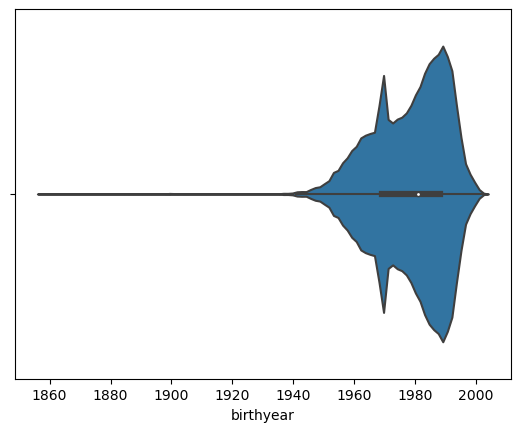

In [47]:
# fill missing numerical feature 
sns.violinplot(combined_df['birthyear'])
plt.show()

A violin plot is a combination of a box plot and a kernel density plot. It provides information about the distribution of the data, including its median, quartiles, and the density estimate. The width of the violin at a particular value indicates the density of data points at that value.

In [29]:
# fill missing birthyear with the mean of the 5 most frequent birth year 
most_freq = int(np.mean(combined_df['birthyear'].value_counts().head().index.tolist()))
combined_df['birthyear'].fillna(most_freq, inplace=True)

In [30]:
combined_df.isnull().sum()

tripduration              0
starttime                 0
stoptime                  0
startstationid           37
startstationname         37
startstationlatitude      0
startstationlongitude     0
endstationid             37
endstationname           37
endstationlatitude        0
endstationlongitude       0
bikeid                    0
usertype                  0
birthyear                 0
gender                    0
dtype: int64

In [ ]:
# we will map the missing values of start and end station id/name, using a dictionary that contains the stationss longitudes and latidtudes
station_mapping = {}

# Iterate over the dataset and populate the station_mapping dictionary
for _, row in combined_df.iterrows():
    lat = row['startstationlatitude']
    lon = row['startstationlongitude']
    station_id = row['startstationid']
    station_name = row['startstationname']
    
    if pd.notnull(station_id) and pd.notnull(station_name):
        station_mapping[(lat, lon)] = (station_id, station_name)


missing_rows = combined_df[combined_df['startstationid'].isnull() | combined_df['startstationname'].isnull()] | 
combined_df[combined_df['endstationid'].isnull() | combined_df['endstationname'].isnull()]

for _, row in missing_rows.iterrows():
    lat = row['startstationlatitude']
    lon = row['startstationlongitude']
    station_info = combined_df[(combined_df['startstationlatitude'] == lat) & (combined_df['startstationlongitude'] == lon) & (~combined_df['startstationid'].isnull()) & (~df['startstationname'].isnull())].head(1)
    (~combined_df['endstationid'].isnull()) & (~df['endstationname'].isnull())].head(1)
    
    if not station_info.empty:
        combined_df.loc[row.name, 'startstationid'] = station_info['startstationid'].values[0]
        combined_df.loc[row.name, 'startstationname'] = station_info['startstationname'].values[0]
        combined_df.loc[row.name, 'endstationid'] = station_info['endstationid'].values[0]
        combined_df.loc[row.name, 'endstationname'] = station_info['endstationname'].values[0]


In [32]:
combined_df.isnull().sum()

tripduration             0
starttime                0
stoptime                 0
startstationid           0
startstationname         0
startstationlatitude     0
startstationlongitude    0
endstationid             0
endstationname           0
endstationlatitude       0
endstationlongitude      0
bikeid                   0
usertype                 0
birthyear                0
gender                   0
dtype: int64

In [69]:
combined_df.dtypes

tripduration              float64
startstationid            float64
startstationname           object
startstationlatitude      float64
startstationlongitude     float64
endstationid              float64
endstationname             object
endstationlatitude        float64
endstationlongitude       float64
bikeid                      int64
usertype                   object
birthyear                 float64
gender                      int64
date                       object
time                       object
Endtime                    object
Years_old                 float64
Age_group                category
tripduration_bins        category
dtype: object

Now that we have filled our dataset, we will be cleaning it by adding a few columns to further clean it

C:\Users\hamza\AppData\Local\Temp\ipykernel_14704\826120687.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(df.corr(), dtype=np.bool)


<AxesSubplot:>

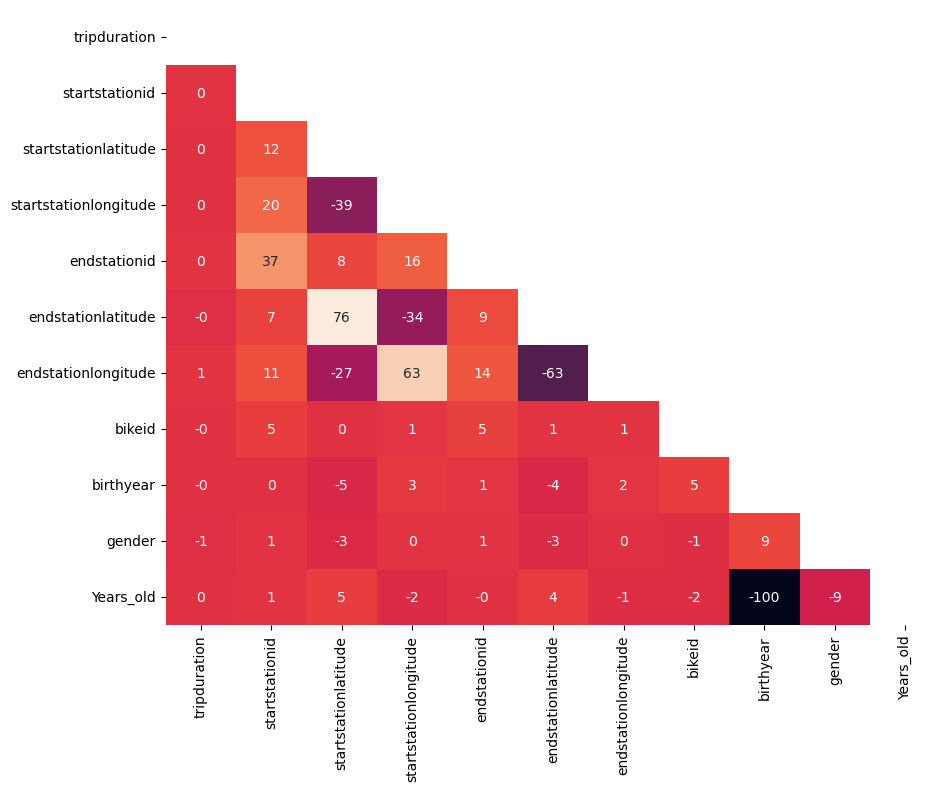

In [90]:
# Generate a mask for the upper triangle
df = combined_df
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Make the figsize 10 x 8
plt.figure(figsize=(10, 8))
# Plot heatmap of correlations
sns.heatmap(df.corr()*100, fmt='.0f', annot=True, mask=mask, cbar=False)

Not much can be extracted from the corelation matrix

In [33]:
#breaking down the date time format for further profiling of the trips
#add the column Years old to allow profiling by age:
combined_df['StartDate'] = pd.to_datetime(combined_df['starttime'])
combined_df['StopDate'] = pd.to_datetime(combined_df['stoptime'])
combined_df['date'] = combined_df['StartDate'].dt.date
combined_df["time"] = combined_df["StartDate"].dt.time
combined_df["Endtime"] = combined_df["StopDate"].dt.time
combined_df['birthyear'] = pd.to_numeric(combined_df['birthyear'], downcast='integer')
combined_df['year']= combined_df['StartDate'].dt.year
combined_df['Years_old'] = combined_df['year'] - combined_df['birthyear'] 

In [41]:
combined_df['date'].tail()

8023750    2019-03-31
8023751    2019-03-31
8023752    2019-03-31
8023755    2019-03-31
8023757    2019-03-31
Name: date, dtype: object

In [ ]:
for index, row in combined_df.iterrows():
    start_date = row['StartDate'].date()
    stop_date = row['StopDate'].date()
    
    if start_date != stop_date:
        print("Different date found at index:", index)
        # Perform any further actions as needed
#no instnat where start and stop dates are different hence we only save one date

In [34]:
combined_df.drop(['year'], axis=1, inplace=True)
combined_df.drop(['StartDate'], axis=1, inplace=True)
combined_df.drop(['StopDate'], axis=1, inplace=True)
combined_df.drop(['starttime'], axis=1, inplace=True)
combined_df.drop(['stoptime'], axis=1, inplace=True)


User Profiling:

c:\Users\hamza\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


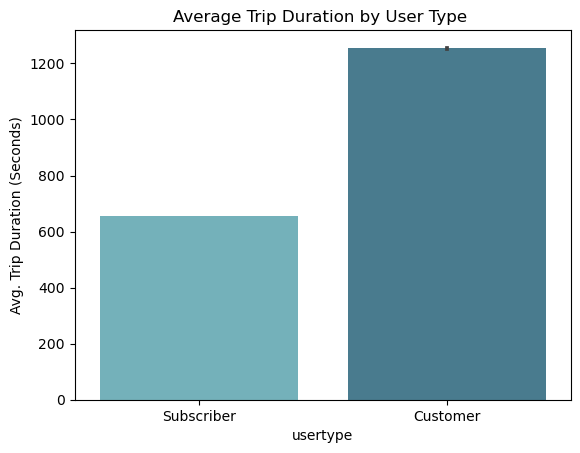

In [37]:
# avg trip duratiob by user typw
ax2 = sns.barplot('usertype', normalised['tripduration'], data = normalised,palette="GnBu_d")
ax2.set_title('Average Trip Duration by User Type ')
ax2.set_ylabel('Avg. Trip Duration (Seconds)')
plt.show()

In [ ]:
Customers, on average have higher trip durations we can try to maximise these buy applying higher charges for cusotmers

In [35]:
#define age groups:
Age_Groups = ["<20", "20-29", "30-39", "40-49", "50-59", "60+"]
Age_Groups_Limits = [0, 20, 30, 40, 50, 60, np.inf]
combined_df["Age_group"] = pd.cut(combined_df["Years_old"], Age_Groups_Limits, labels=Age_Groups)

c:\Users\hamza\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



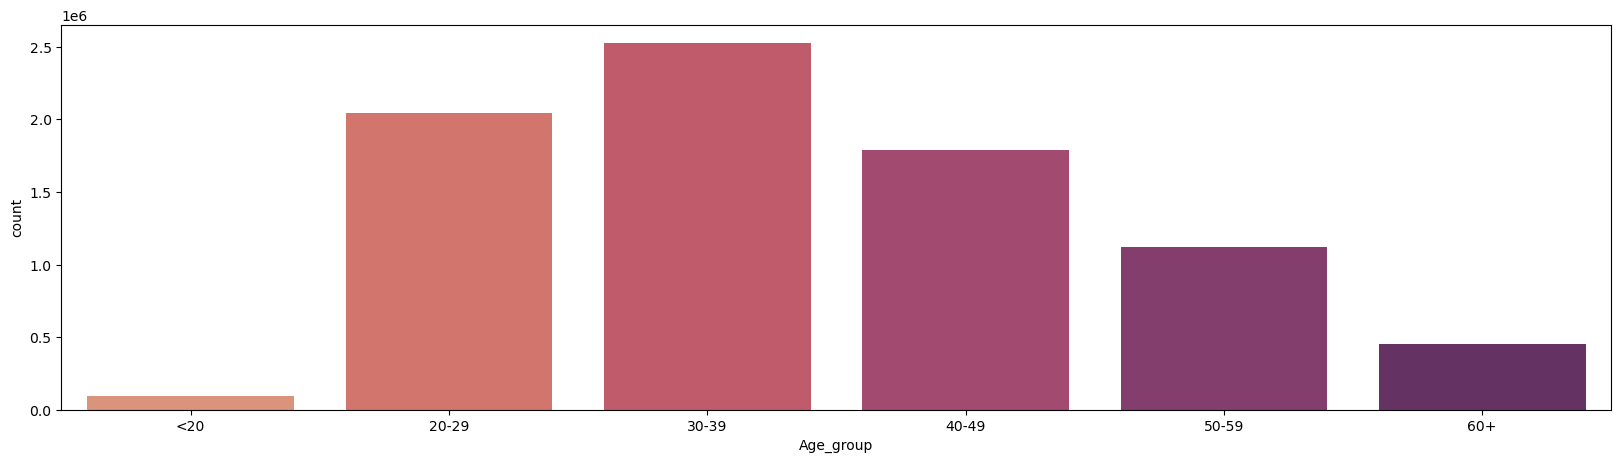

In [54]:
#age disrtibution:
plt.figure(figsize = (20,5))
sns.countplot(combined_df["Age_group"],palette = "flare")
plt.show()

c:\Users\hamza\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



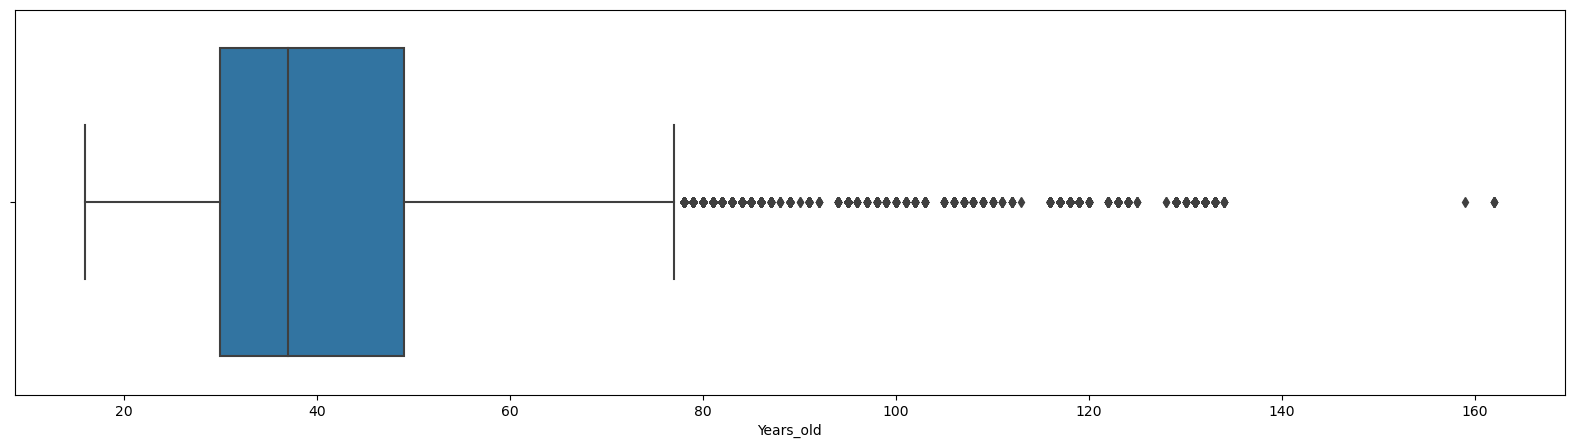

In [55]:
#Age_wise Outliers
plt.figure(figsize = (20,5))
sns.boxplot(combined_df.Years_old)
plt.show()

Hence we can say that on an average most people lie in the age bracked of 30-50, where 70+ are outliers

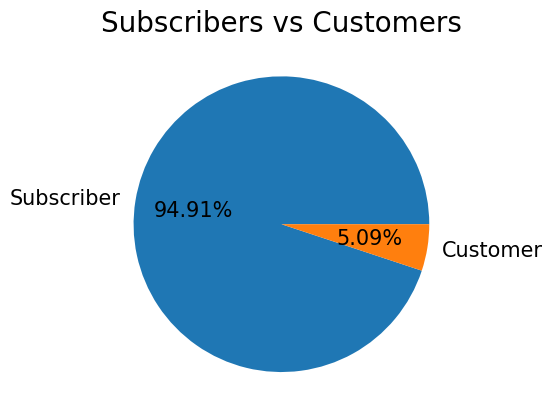

In [42]:
#user type:
user_type_duration = combined_df.groupby('usertype')['tripduration'].mean()

plt.pie(user_type_duration.values, labels=user_type_duration.index, autopct='%1.2f%%', textprops={'fontsize': 15})
plt.title('User Types Segmented by Average Trip Duration', fontsize=20)
plt.show()


In [46]:
# Gender based variation
import plotly.express as px
px.pie(values = combined_df['gender'].value_counts(),
       names =combined_df['gender'].value_counts().index,
       title ="Gender Variation")

labels are 1 : Male, 2 : Female, 0 : No_Gender

After User Profiling let us understand our Trip profiles:

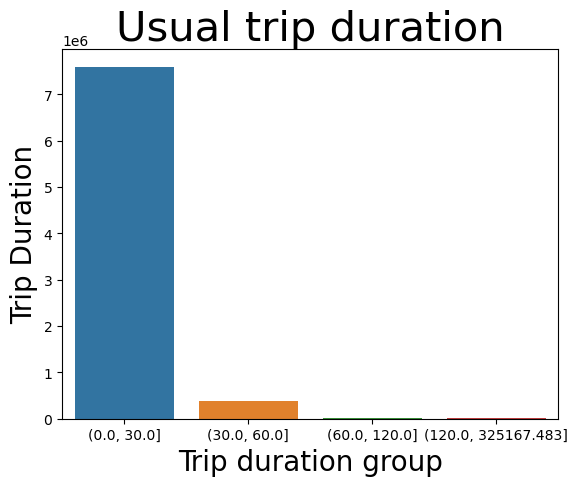

In [58]:
#as we have seen trip duration has severe outliers, lets see the distrubtion via a bar chart for better viisualization
#converting trip duration from seconds to minuits
combined_df['tripduration'] = combined_df['tripduration']/60

#creating bins (0-30min, 30-60min, 60-120min, 120 and above)
max_limit = combined_df['tripduration'].max()
combined_df['tripduration_bins'] = pd.cut(combined_df['tripduration'], [0, 30, 60, 120, max_limit])

sns.barplot(x='tripduration_bins', y='tripduration', data=combined_df, estimator=np.size)
plt.title('Usual trip duration', fontsize=30)
plt.xlabel('Trip duration group', fontsize=20)
plt.ylabel('Trip Duration', fontsize=20)
plt.show()

Let us drill down into what type of users travel>30 

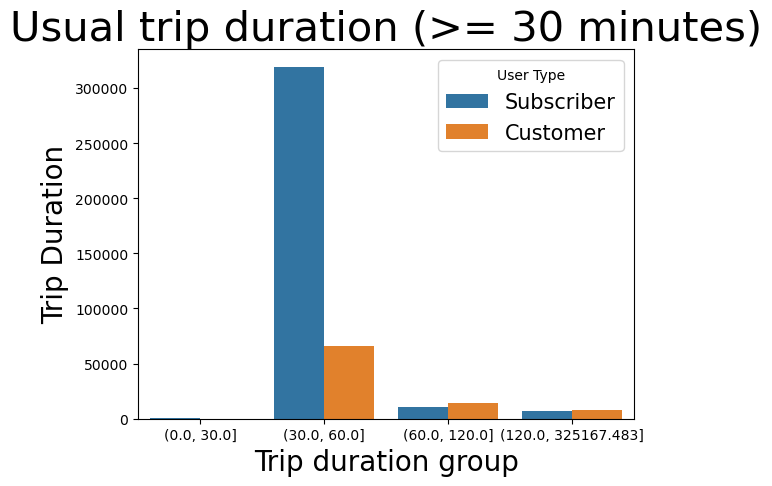

In [59]:
sns.barplot(x='tripduration_bins', y='tripduration', hue='usertype', data=combined_df[combined_df['tripduration'] >= 30], estimator=np.size)
plt.title('Usual trip duration (>= 30 minutes)', fontsize=30)
plt.xlabel('Trip duration group', fontsize=20)
plt.ylabel('Trip Duration', fontsize=20)
plt.legend(title='User Type', fontsize=15)
plt.show()


In [ ]:
For 30-60, still there is a high proportion of subscribers compared to customers, however for more than that, we can see that since customers 
users that rent the bikes one time, they want to maximise there time on the bike. These could be toruists traveling, we can introuce higher 
charges for trip durations greate than 30 for customers so that we can attain high profits, and enocuraging them to subscribe.

c:\Users\hamza\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



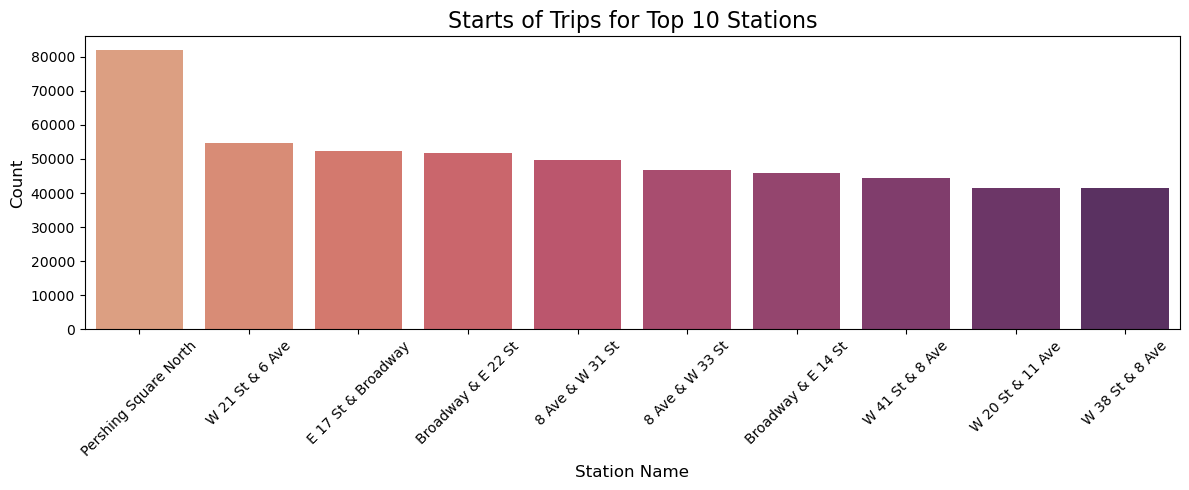

In [65]:
plt.figure(figsize=(12, 5))
sns.countplot('startstationname', data=combined_df, order=combined_df['startstationname'].value_counts().index[:10], palette='flare')
plt.title("Starts of Trips for Top 10 Stations", fontsize=16)
plt.xlabel("Station Name", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


c:\Users\hamza\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



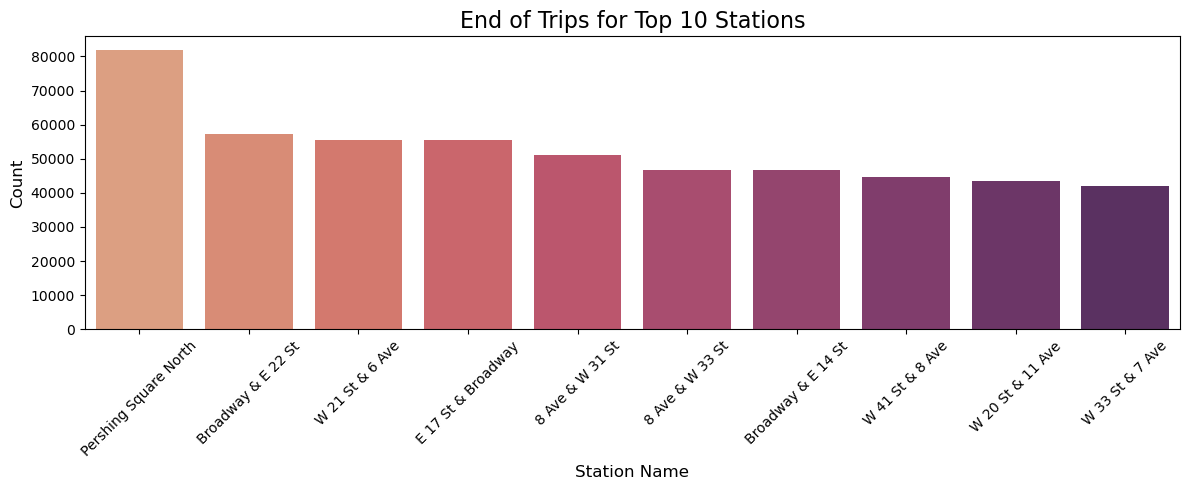

In [68]:
plt.figure(figsize=(12, 5))
sns.countplot('endstationname', data=combined_df, order=combined_df['endstationname'].value_counts().index[:10], palette='flare')
plt.title("End of Trips for Top 10 Stations", fontsize=16)
plt.xlabel("Station Name", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Most of the stations repeat, in our visulaization we will look if cycles are found, that is start and end stations are same

In [3]:
#top 10 routes
trips_df = pd.DataFrame()
trips_df = combined_df.groupby(['startstationname','endstationname']).size().reset_index(name = 'Number of Trips')
trips_df = trips_df.sort_values('Number of Trips',ascending = False)
trips_df["startstationname"] = trips_df["startstationname"].astype(str)
trips_df["endstationname"] = trips_df["endstationname"].astype(str)
trips_df["Routes"] = trips_df["startstationname"] + " to " + trips_df["endstationname"]
trips_df = trips_df[:10]
trips_df = trips_df.reset_index()
trips_df

,index,startstationname,endstationname,Number of Trips,Routes
0,134833,E 7 St & Avenue A,Cooper Square & Astor Pl,3531,E 7 St & Avenue A to Cooper Square & Astor Pl
1,254908,W 21 St & 6 Ave,9 Ave & W 22 St,2980,W 21 St & 6 Ave to 9 Ave & W 22 St
2,212347,Pershing Square North,W 33 St & 7 Ave,2945,Pershing Square North to W 33 St & 7 Ave
3,224428,S 4 St & Wythe Ave,N 6 St & Bedford Ave,2559,S 4 St & Wythe Ave to N 6 St & Bedford Ave
4,211878,Pershing Square North,Broadway & W 32 St,2559,Pershing Square North to Broadway & W 32 St
5,258337,W 26 St & 8 Ave,W 27 St & 10 Ave,2469,W 26 St & 8 Ave to W 27 St & 10 Ave
6,212008,Pershing Square North,E 24 St & Park Ave S,2435,Pershing Square North to E 24 St & Park Ave S
7,203224,N 6 St & Bedford Ave,S 4 St & Wythe Ave,2424,N 6 St & Bedford Ave to S 4 St & Wythe Ave
8,258796,W 27 St & 10 Ave,W 26 St & 8 Ave,2368,W 27 St & 10 Ave to W 26 St & 8 Ave
9,219235,Richardson St & N Henry St,Graham Ave & Conselyea St,2320,Richardson St & N Henry St to Graham Ave & Con...


In [36]:
# Dictionary mapping values in the 'gender' column to new values
mapping = {0: 'Unknown', 1: 'Male', 2: 'Female'}

# Use the 'map' method to change the values in the 'gender' column
combined_df['gender'] = combined_df['gender'].map(mapping)

In [37]:
combined_df.isnull().sum()

tripduration             0
startstationid           0
startstationname         0
startstationlatitude     0
startstationlongitude    0
endstationid             0
endstationname           0
endstationlatitude       0
endstationlongitude      0
bikeid                   0
usertype                 0
birthyear                0
gender                   0
date                     0
time                     0
Endtime                  0
Years_old                0
Age_group                0
dtype: int64

In [45]:
combined_df.to_csv('Clean_Final_BikeData.csv', index=False, chunksize=None)


In [ ]:

# Read the CSV file into a pandas DataFrame
df = pd.read_csv('Clean_Final_BikeData.csv')

# Get the number of rows in the DataFrame
num_rows = df.shape[0]

# Print the number of rows
print("Number of rows:", num_rows)
